## In-class exercise

We will now try to use a neural network to fit a simple nonlinear function. Suppose that we are trying to learn a scalar relation:

    y = f0(x)
    
where `x` and `y` are scalars. Suppose that the true function is `f0(x) = sin(2*pi*x)`, but the estimator does not know this. We get training data as follows.

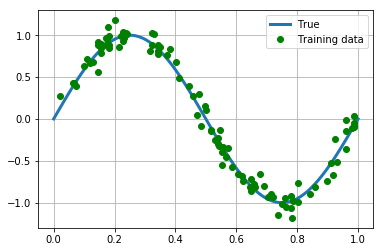

In [1]:
# Synthetic training data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nsamp = 100
xtr = np.random.rand(nsamp)
ytr = np.sin(2*np.pi*xtr) + np.random.normal(scale=0.1,size=nsamp)
xts = np.random.rand(nsamp)
yts = np.sin(2*np.pi*xts) + np.random.normal(scale=0.1,size=nsamp)

# True function
nplot = 100
xp = np.linspace(0,1,nplot)
yp = np.sin(2*np.pi*xp)

# PLot
plt.plot(xp,yp,linewidth=3)
plt.plot(xtr,ytr,'go')
#plt.axis([0,1,-1.5,1.5])
plt.grid()
plt.legend(['True', 'Training data'])
plt.show()

Now try to have a neural network *learn* the relation `y=f(x)`.
* Clear the keras session
* Create a neural network with 4 hidden units, 1 output unit
* Use a sigmoid activation for the hidden units and a `linear` activation for the output layer
* Compile with `mean_squared_error` for the `loss` and `metrics`
* Fit the model.  You may need to play with the learning rate `lr` and you will probably need many `epochs`.
* Plot the predicted and true function

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.backend as K
# TODO
K.clear_session()
nin = 1  # dimension of input data
nh = 4    # number of hidden units
nout = 1  # number of outputs = 1 since this is binary
model = Sequential()
model.add(Dense(units=nh, input_shape=(1,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='linear', name='output'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 4)                 8         
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [3]:
opt = optimizers.Adam(lr=0.05)
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mse'])

Instructions for updating:
Use tf.cast instead.


In [4]:
nit = 100   # number of training iterations
nepoch_per_it = 50  # number of epochs per iterations

# Loss, accuracy and epoch per iteration
loss = np.zeros(nit)
acc = np.zeros(nit)
epoch_it = np.zeros(nit)

# Main iteration loop
for it in range(nit):
    
    # Continue the fit of the model
    init_epoch = it*nepoch_per_it
    model.fit(xtr, ytr, epochs=nepoch_per_it, batch_size=100, verbose=0)
    
    # Measure the loss and accuracy on the training data
    lossi, acci = model.evaluate(xts,yts, verbose=0)
    epochi = (it+1)*nepoch_per_it
    epoch_it[it] = epochi
    loss[it] = lossi
    acc[it] = acci
    if (it%10)==0:
        print("epoch=%4d loss=%12.4e acc=%7.5f" % (epochi,lossi,acci))

Instructions for updating:
Use tf.cast instead.
epoch=  50 loss=  2.1989e-01 acc=0.21989
epoch= 550 loss=  2.5154e-02 acc=0.02515
epoch=1050 loss=  1.3521e-02 acc=0.01352
epoch=1550 loss=  1.0107e-02 acc=0.01011
epoch=2050 loss=  1.0056e-02 acc=0.01006
epoch=2550 loss=  1.0046e-02 acc=0.01005
epoch=3050 loss=  1.0072e-02 acc=0.01007
epoch=3550 loss=  1.0036e-02 acc=0.01004
epoch=4050 loss=  1.0040e-02 acc=0.01004
epoch=4550 loss=  1.0044e-02 acc=0.01004


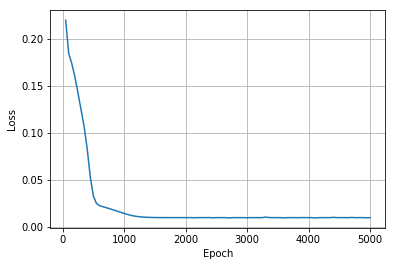

In [5]:
epoch_it = np.arange(1,nit+1)*nepoch_per_it
plt.plot(epoch_it, loss)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [6]:
yhat = model.predict(xtr)

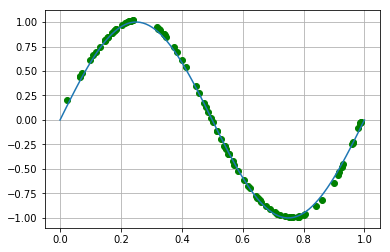

In [7]:
plt.plot(xtr, yhat,'go')
plt.plot(xp, yp)
plt.grid()
plt.show()